## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
#Import the required libs for basic data handling
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:

project_path = "/content/drive/My Drive/GL_Colab/20200412/dog-breed-classification/"
#project_path = "./DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
#Unzip and extract all the training images
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
#Unzip and extract all the test images

with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
#Unzip and extract the test image ids

#with ZipFile(project_path+'sample_submission.csv', 'r') as z:
#  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
#Unzip and extract the training image ids and corresponding labels

#with ZipFile(project_path+'labels.csv.zip', 'r') as z:
#  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
#Get the dog breed labels from the unzipped file
label_df = pd.read_csv(project_path+"labels.csv")

In [9]:
#sanity check
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
#Check the unique # of breeds which is essentially the num of classes
len(label_df.breed.unique())

120

In [11]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


### Print the count of each category of Dogs given in the dataset



In [12]:
#Check the counts of each breed in the labels in the training dataset
label_df.breed.value_counts()


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
#OneHotEncoding of labels
#We will use LabelBinarizer from scikit for label one hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [14]:
#Initialize the encoder and fit on the training labels
lb = LabelBinarizer()
lb.fit(label_df.breed)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [0]:
#Generate the onhot encodings for all labels and store in the labels array. Will use this later
labels = lb.transform(label_df.breed)

In [16]:
#Sanity and shape of labels to check the encoding and no of features
labels.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2 #reading image files
from tqdm import tqdm #track loading progress

In [18]:
x_train_data = [] #store the images as arrays
y_train_data = [] #Will have the corresponding labels

img_rows = 128
img_cols = 128
i = 0 # initialisation
for f in tqdm(label_df.id.values): # f for format ,jpg
    img = cv2.imread('./train/{}.jpg'.format(f), 1) #1 for reading color images
    img_resize = cv2.resize(img, (img_rows, img_cols)) #resize to our initial target size
    x_train_data.append(img_resize)
    #load corresponding image labels
    y_train_data.append(labels[i])
    i = i + 1

100%|██████████| 10222/10222 [00:31<00:00, 325.16it/s]


In [0]:
#Convert both x_train and y_train to arrays for ease of operation later as part of model training
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)

In [20]:
#Check the shape of the x_train and y_train now
print("Shape of the loaded training data",x_train_data.shape)
print("Shape of y train",y_train_data.shape)

#Images are in the right shape for our CNN models

Shape of the loaded training data (10222, 128, 128, 3)
Shape of y train (10222, 120)


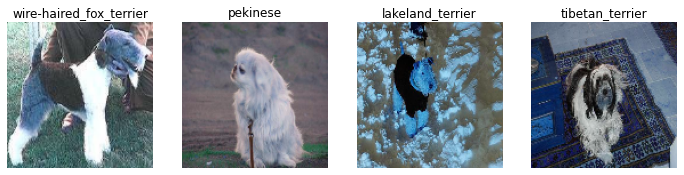

In [21]:
#Lets visualize and see what comes out
plt.figure(figsize=(12,8))
for p in range(1,5):
  ii = np.random.randint(0,1000)
  plt.subplot(1,4,p)
  plt.axis("off")
  plt.title(label_df.iloc[ii].breed)
  plt.imshow(x_train_data[ii])


#Very challenging image data set as can be seen from the sample

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Lets normalize the image by simply dividing by 255
x_train_data = x_train_data/255

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
#We will train_test_split from sklearn for splitting the data among train and validation
from sklearn.model_selection import train_test_split

In [0]:
#Use test split of 20% data

x_train, x_val, y_train, y_val = train_test_split(x_train_data,y_train_data,test_size=0.2,random_state=5)

In [25]:
#Check the shape of the training and validation sets
print("Shape of the x train",x_train.shape)
print("Shape of y train",y_train.shape)
print("Shape of the x val",x_val.shape)
print("Shape of y val",y_val.shape)

Shape of the x train (8177, 128, 128, 3)
Shape of y train (8177, 120)
Shape of the x val (2045, 128, 128, 3)
Shape of y val (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
#Read the samples id values
test_img = pd.read_csv(project_path+"sample_submission.csv",usecols=["id"])

In [27]:
#Sanity
test_img.sample(5)

,id
8846,dc110cfb9e242562f5ad75391594832d
4807,7564e4c4a0bd13e2b8043461fc172220
4264,6850f70da9a13a14539d2b1226025c8b
9714,f0ee665e8ec8ee4b7b26984bebfdf356
2744,4330a4bb927418c7c2ecebb560c0bb71


Run the below code to load the test image files in x_test_feature

In [28]:
#Lets only read 5 samples due to resource limitations (notebook crashed with all the images)
#For future - we can read directly from directory using imagedatagenerator flow from directory for prediction
#For our purposes we will only predict few samples.

x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img[0:5].id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 5/5 [00:00<00:00, 239.90it/s]


In [0]:
#Convert to array for ease of manipulation later
x_test_feature = np.array(x_test_feature)

In [30]:
#Check the shape of the test image data ..only sample of 5 images
print("Shape of the test dataset",x_test_feature.shape)

Shape of the test dataset (5, 128, 128, 3)


Normalize the test data and convert it into 4 dimensions

In [0]:
#We will divide by 255 to normalize. Same as training
x_test_feature = x_test_feature/255

In [32]:
#Sanity
x_test_feature[0,0,0]

array([0.2627451 , 0.43529412, 0.40784314])

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
###Lets load required tensorflow and keras modules 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy

In [0]:
#Simple first model

model = Sequential()

#First Conv layer with 32 5x5 filters, relu activation
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(128,128,3),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model.add(Conv2D(32,(3,3),activation="relu",name="conv_2"))

#Flatten
model.add(Flatten(name="flat_1"))

#Dense layer with 256 neurons
model.add(Dense(256,activation="relu",name="dense_1"))

#Dense output layer with 120 neurons
model.add(Dense(120,activation="softmax",name="dense_2"))


In [35]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model
#Using Adam optimizer
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [39]:
#Lets train the model
history = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/10
64/64 [==============================] - 7s 104ms/step - loss: 6.0576 - accuracy: 0.0099 - val_loss: 4.7834 - val_accuracy: 0.0112
Epoch 2/10
64/64 [==============================] - 6s 96ms/step - loss: 4.7151 - accuracy: 0.0235 - val_loss: 4.7256 - val_accuracy: 0.0166
Epoch 3/10
64/64 [==============================] - 6s 91ms/step - loss: 4.0183 - accuracy: 0.1312 - val_loss: 4.9633 - val_accuracy: 0.0284
Epoch 4/10
64/64 [==============================] - 6s 89ms/step - loss: 2.0222 - accuracy: 0.5374 - val_loss: 6.4906 - val_accuracy: 0.0313
Epoch 5/10
64/64 [==============================] - 6s 87ms/step - loss: 0.3740 - accuracy: 0.9247 - val_loss: 9.5410 - val_accuracy: 0.0298
Epoch 6/10
64/64 [==============================] - 6s 87ms/step - loss: 0.0597 - accuracy: 0.9916 - val_loss: 10.4311 - val_accuracy: 0.0284
Epoch 7/10
64/64 [==============================] - 6s 88ms/step - loss: 0.0335 - accuracy: 0.9978 - val_loss: 11.1712 - val_accuracy: 0.0240
Epoch 8/10

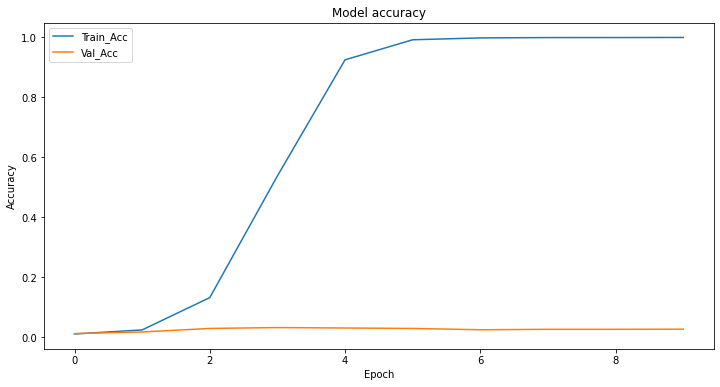

In [41]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

## The model accuracy is very poor !!!!

We can see from the training and validation loss and accuracy that the model is overfitting on the training data set and not learning the features which will be useful in identifying new images. The images themselves as seen in the sample visualization earlier are challenging. We will need to try out various pre-trained models and data augmentation techniques to see if we can get the model to learn better.

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#Lets import image generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#Keep the img size as 128 for now as earlier
img_size=128

In [0]:
#Define a Imagegenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

val_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
)



In [0]:
#Fit the data generator on the training images for trying out zca_whitening
#train_datagen.fit(x_train[0:1000])
#val_datagen.fit(x_val)

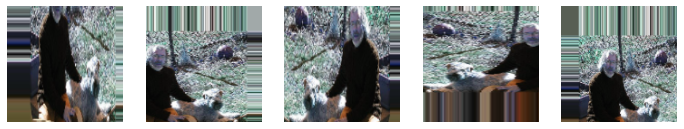

In [45]:
#Sample visualization of possible outputs from the generator

sample_gen = train_datagen.flow(x_train[4:5],batch_size=1)
plt.figure(figsize=(12,12))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(sample_gen.next().squeeze())
    plt.plot()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Initialize the train and validation generators

train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_generator = val_datagen.flow(x_val,y_val,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
#Same architecture as the first model

model1 = Sequential()

#First Conv layer with 32 5x5 filters, relu activation
model1.add(Conv2D(32,(5,5),activation="relu",input_shape=(128,128,3),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model1.add(Conv2D(32,(3,3),activation="relu",name="conv_2"))

#Flatten
model1.add(Flatten(name="flat_1"))

#Dense layer with 256 neurons
model1.add(Dense(256,activation="relu",name="dense_1"))

#Dense output layer with 120 neurons
model1.add(Dense(120,activation="softmax",name="dense_2"))

In [48]:
#Summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model
#Will go with standard adam after few trails 

#opt = Adam(learning_rate=0.0001)
opt = SGD()
model1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [51]:
#No of steps for each epoch...we will for this model go with the total records/batch size as standard

training_steps=train_generator.n//BATCH_SIZE
val_steps=val_generator.n//BATCH_SIZE
(training_steps,val_steps)

(63, 15)

In [52]:
#Lets train the model
#TF2 keras fit method now accepts generators as well

history1 = model1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

Epoch 1/10
63/63 [==============================] - 10s 159ms/step - loss: 4.7918 - accuracy: 0.0134 - val_loss: 4.7853 - val_accuracy: 0.0042
Epoch 2/10
63/63 [==============================] - 10s 156ms/step - loss: 4.7863 - accuracy: 0.0099 - val_loss: 4.7826 - val_accuracy: 0.0146
Epoch 3/10
63/63 [==============================] - 10s 154ms/step - loss: 4.7816 - accuracy: 0.0124 - val_loss: 4.7868 - val_accuracy: 0.0104
Epoch 4/10
63/63 [==============================] - 10s 155ms/step - loss: 4.7766 - accuracy: 0.0104 - val_loss: 4.7692 - val_accuracy: 0.0167
Epoch 5/10
63/63 [==============================] - 10s 152ms/step - loss: 4.7651 - accuracy: 0.0170 - val_loss: 4.7629 - val_accuracy: 0.0104
Epoch 6/10
63/63 [==============================] - 10s 156ms/step - loss: 4.7589 - accuracy: 0.0159 - val_loss: 4.7507 - val_accuracy: 0.0208
Epoch 7/10
63/63 [==============================] - 10s 154ms/step - loss: 4.7463 - accuracy: 0.0213 - val_loss: 4.7676 - val_accuracy: 0.0167

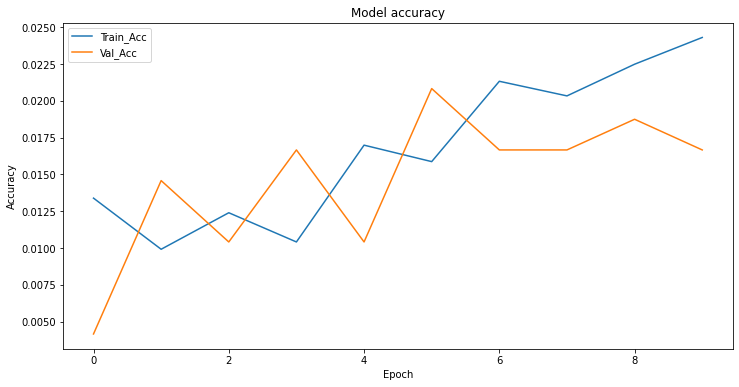

In [53]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

# Model accuracy is still poor!!!

We can see that even with image augmentation, the accuracy did not improve. The overfitting tendency is still seen even though it reduced from the original baseline model. 
The image augmentation has made the model jump around as well with Adam optimizer. Used of SGD slightly reduced the wavering of loss but it still exists. We will need to tune the learning rate and batch size to at least stabilize this model

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [55]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#Flatten
flat = Flatten(name="custom_flat")(base_model.output)

#Dense with 1024
dense1 = Dense(1024,activation="relu",name="custom_dense1")(flat)

#Dense with 256
dense2 = Dense(256,activation="relu",name="custom_dense2")(dense1)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(dense2)

final_model = Model(inputs=base_model.input,outputs=predictions)



### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

In [58]:
#Check the final model summary now
final_model.summary()

#We can see that the base model parameters are frozen and will not be updated during training

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
#Lets compile the model..using Adam

opt = Adam(learning_rate=0.001)
#opt= SGD(learning_rate=0.001,momentum=0.0)
final_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [61]:
#Lets train the model
final_history = final_model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/10
64/64 [==============================] - 10s 155ms/step - loss: 4.7389 - accuracy: 0.0227 - val_loss: 4.6175 - val_accuracy: 0.0479
Epoch 2/10
64/64 [==============================] - 8s 125ms/step - loss: 4.3424 - accuracy: 0.0680 - val_loss: 4.1522 - val_accuracy: 0.0919
Epoch 3/10
64/64 [==============================] - 8s 126ms/step - loss: 3.8452 - accuracy: 0.1236 - val_loss: 3.8120 - val_accuracy: 0.1252
Epoch 4/10
64/64 [==============================] - 8s 127ms/step - loss: 3.5030 - accuracy: 0.1679 - val_loss: 3.6550 - val_accuracy: 0.1423
Epoch 5/10
64/64 [==============================] - 8s 126ms/step - loss: 3.2563 - accuracy: 0.2152 - val_loss: 3.4704 - val_accuracy: 0.1658
Epoch 6/10
64/64 [==============================] - 8s 126ms/step - loss: 3.0917 - accuracy: 0.2417 - val_loss: 3.4313 - val_accuracy: 0.1731
Epoch 7/10
64/64 [==============================] - 8s 131ms/step - loss: 2.9461 - accuracy: 0.2701 - val_loss: 3.3625 - val_accuracy: 0.1897
Epoch

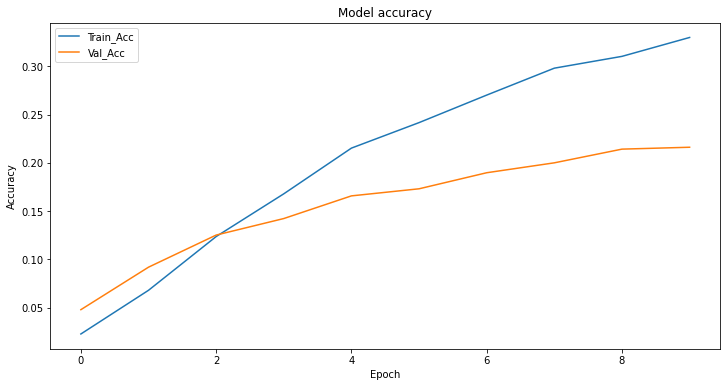

In [62]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

The accuracy has improved significantly. However, there is very clear overfitting happening as seen from the decreasing training loss but plateauing validation loss.
We will need to try out other hyperparameter tuning activities including use of image data augmentation to see if the overfitting can be reduced and overall accuracy improved

Lets play around with changes to see if the model accuracy increases and overfitting also reduces

In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#################################################################
#Adding this piece to help since this piece is being used for multiple trials of the model hyper parameters
tf.keras.backend.clear_session()

#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

##################################################################

#Flatten
#lr = Flatten(name="custom_flat")(base_model.output)

#Dense with 1024
#lr = Dense(1024,activation="relu",name="custom_dense1")(lr)
#lr = Dense(1024,activation="relu",name="custom_dense1")(base_model.output)
#lr = Dense(1024,name="custom_dense1")(lr)

lr = Dense(512,activation="relu",name="custom_dense1")(base_model.output) #Add dense layer qith 512 neurons

#Add a BN layer
lr = BatchNormalization()(lr)

#lr = Activation("relu")(lr)

#Add a dropout layer
lr = Dropout(0.5)(lr)
#drp1 = BatchNormalization()(dense1)

#Dense with 256
lr = Dense(256,activation="relu",name="custom_dense2")(lr)
#lr = Dense(256,name="custom_dense2")(lr)

lr = BatchNormalization()(lr)

#lr = Activation("relu")(lr)

lr = Dropout(0.5)(lr)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(lr)
#predictions = Dense(120,activation="softmax",name="custom_pred")(lr)

new_model = Model(inputs=base_model.input,outputs=predictions)



In [64]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Lets compile the model
#Compile the model
opt = Adam(learning_rate=0.001)
#opt= SGD(learning_rate=0.001,momentum=0.9)
new_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 32
EPOCHS = 20

In [67]:
#Lets train the model
new_history = new_model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/20
256/256 [==============================] - 10s 41ms/step - loss: 5.1155 - accuracy: 0.0330 - val_loss: 4.1932 - val_accuracy: 0.0924
Epoch 2/20
256/256 [==============================] - 10s 38ms/step - loss: 4.1588 - accuracy: 0.0898 - val_loss: 3.6770 - val_accuracy: 0.1506
Epoch 3/20
256/256 [==============================] - 10s 38ms/step - loss: 3.7452 - accuracy: 0.1398 - val_loss: 3.4934 - val_accuracy: 0.1848
Epoch 4/20
256/256 [==============================] - 10s 37ms/step - loss: 3.5412 - accuracy: 0.1662 - val_loss: 3.3714 - val_accuracy: 0.1985
Epoch 5/20
256/256 [==============================] - 10s 38ms/step - loss: 3.3583 - accuracy: 0.1911 - val_loss: 3.3059 - val_accuracy: 0.2122
Epoch 6/20
256/256 [==============================] - 10s 38ms/step - loss: 3.2291 - accuracy: 0.2102 - val_loss: 3.2390 - val_accuracy: 0.2240
Epoch 7/20
256/256 [==============================] - 10s 38ms/step - loss: 3.1611 - accuracy: 0.2267 - val_loss: 3.2472 - val_accuracy:

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

Trial 1: The overfitting reduced slightly with the addition of dropout layers, but the accuracy is still low and validation loss again plateaued.

Trial 2: Adding BN improved the training accuracy significantly, but the overfitting increased as well.

Trial 3: Adding BN before activation function also did not improve much the validation accuracy or reduce overfitting.

Trial 4: Only have a flatten layer and then the final SoftMax prediction layer. Seeing the same behavior still with overfitting and validation accuracy less

Trial 5: Adding BN and dropout with 0.5 resulted in overfitting even though it reduced a bit from the previous attempts

Trial 6: Adding BN and dropout with 0.8 resulted in underfitting!!

Trial 7: Remove Flatten and add a dense of 512 and then 256 followed by output with BN and dropout layers - accuracy improved but then overfitting was also seen for 20 epochs.

We need to add data augmentation to see if it will help better generalization


In [0]:
def append_ext(fn):
    return fn+".jpg"

#### Considering the computational time and (lack of resources) lets pick a smaller sample and see if we can try different 'top' layer architecture to check performance

In [0]:
##Lets see if we can take a smaller sample and run more epochs to see if accuracy levels will improve

In [0]:
#Get a sample of 1000 rows and add file extensions like earlier to read from directory directly
sample_label = label_df.sample(n=1000,random_state=5)

In [0]:
sample_label.id = sample_label.id.apply(append_ext)

In [72]:
#sanity
sample_label.head()

,id,breed
5086,80c9bfd32bdc32998a926edc1b186d9d.jpg,schipperke
5635,8e17a8cac3752b5341c951fcba07ece9.jpg,japanese_spaniel
42,011e06760794850c40f23d6426c40774.jpg,dhole
1644,28b0c66727c333afe43cb7c6006cd3a0.jpg,newfoundland
313,079e17a742380d333950962f2c83ffd2.jpg,dingo


In [0]:
#Define a Imagegenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    validation_split=0.2
)

In [74]:
img_size = 224

#Considering the number of images and their size the notebook crashed while trying out various transformations. 
#We will therfore use the flow_from_dataframe method to try to read the data in batches from the directory


train_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                              x_col="id",y_col="breed",
                                              target_size=(img_size,img_size),
                                              subset="training",
                                              has_ext=False,
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42,
                                              class_mode="categorical") 




val_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                            x_col="id",y_col="breed",
                                            target_size=(img_size,img_size),
                                            subset="validation",
                                            has_ext=False,
                                            batch_size=1,
                                            shuffle=True,
                                            seed=42,
                                            class_mode="categorical")

Found 800 validated image filenames belonging to 120 classes.
Found 200 validated image filenames belonging to 120 classes.


In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#Flatten
x = Flatten(name="custom_flat")(base_model.output)

#Dense with 512
x = Dense(512,activation="relu",name="custom_dense1")(x)

#Add a dropout
x = Dropout(0.6,name="custom_drop1")(x)

#Dense with 512
x = Dense(512,activation="relu",name="custom_dense2")(x)

#Add a dropout
x = Dropout(0.6,name="custom_drop2")(x)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(x)

model_sample = Model(inputs=base_model.input,outputs=predictions)

In [76]:
model_sample.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)

#save model after every epoch since the training takes lot of time

savepath = "/content/drive/My Drive/dogbreed/fc_model_sample_best.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Compile the model
#opt=SGD()
#opt = SGD(learning_rate=0.001,momentum=0.9)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.6)
opt = Adam(learning_rate=0.001)
model_sample.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
BATCH_SIZE = 32
EPOCHS = 6

In [80]:
#Run thru all the samples before considering the batch as complete
training_steps=train_generator.n
val_steps=val_generator.n
(training_steps,val_steps)

(800, 200)

In [81]:
#Lets train the model
history_sample = model_sample.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

Epoch 1/6
800/800 [==============================] - ETA: 0s - loss: 4.3666 - accuracy: 0.0605
Epoch 00001: val_loss improved from inf to 4.22107, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 379s 474ms/step - loss: 4.3666 - accuracy: 0.0605 - val_loss: 4.2211 - val_accuracy: 0.0850
Epoch 2/6
800/800 [==============================] - ETA: 0s - loss: 3.1797 - accuracy: 0.2029
Epoch 00002: val_loss improved from 4.22107 to 3.87841, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 379s 473ms/step - loss: 3.1797 - accuracy: 0.2029 - val_loss: 3.8784 - val_accuracy: 0.1150
Epoch 3/6
800/800 [==============================] - ETA: 0s - loss: 2.4761 - accuracy: 0.3264
Epoch 00003: val_loss improved from 3.87841 to 3.78340, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 376s 471ms/step - l

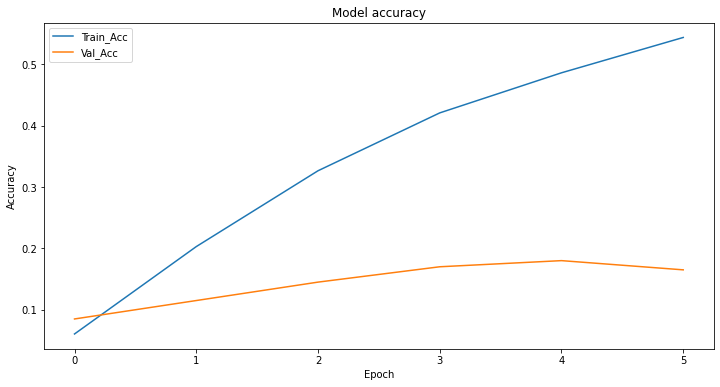

In [82]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_sample.history['accuracy'])
plt.plot(history_sample.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

This model also is clearly overfitting and accuracy does not seem to improve a lot. We clearly need to go back to the previous architecture and use more samples in order to improve the accuracy as well as reduce overfitting.
(Multiple hyperparameters were tried out like no of layers, no of neurons, dropout rates and adding batch normalization layers but continue to have the same behaviour.)